In [1]:
from model import Model

Model.set_energyplus_folder('/usr/local/EnergyPlus-9-3-0/')

In [2]:
class Agent:
    """
    This agent do nothing
    """
    def __init__(self):
        pass
    
    def step(self, state, action_queue, timestep):
        print(timestep, state)

In [3]:
model = Model(idf_file_name="5ZoneAirCooled.idf",
              weather_file="USA_IL_Chicago-OHare.Intl.AP.725300_TMY3.epw",
              agent=Agent())

In [4]:
# Check the graph of zones
model.get_link_zones()

{'Outdoor': {'PLENUM-1', 'SPACE1-1', 'SPACE2-1', 'SPACE3-1', 'SPACE4-1'},
 'PLENUM-1': {'Outdoor'},
 'SPACE1-1': {'Outdoor', 'SPACE2-1', 'SPACE4-1', 'SPACE5-1'},
 'SPACE2-1': {'Outdoor', 'SPACE1-1', 'SPACE3-1', 'SPACE5-1'},
 'SPACE3-1': {'Outdoor', 'SPACE2-1', 'SPACE4-1', 'SPACE5-1'},
 'SPACE4-1': {'Outdoor', 'SPACE1-1', 'SPACE3-1', 'SPACE5-1'},
 'SPACE5-1': {'SPACE1-1', 'SPACE2-1', 'SPACE3-1', 'SPACE4-1'}}

In [10]:
import occupancy_generator

# Generate ony day schedule and add to the model directly
a, b = occupancy_generator.OccupancyGenerator(model).generate_daily_schedule(add_to_model=False)

In [6]:
# Check all possible actions for the current model
alist = model.get_possible_actions()

[{'Component Type': 'Weather Data',
  'Control Type': 'Outdoor Dry Bulb',
  'Actuator Key': 'Environment'},
 {'Component Type': 'Weather Data',
  'Control Type': 'Outdoor Dew Point',
  'Actuator Key': 'Environment'},
 {'Component Type': 'Weather Data',
  'Control Type': 'Outdoor Relative Humidity',
  'Actuator Key': 'Environment'},
 {'Component Type': 'Weather Data',
  'Control Type': 'Diffuse Solar',
  'Actuator Key': 'Environment'},
 {'Component Type': 'Weather Data',
  'Control Type': 'Direct Solar',
  'Actuator Key': 'Environment'},
 {'Component Type': 'Weather Data',
  'Control Type': 'Wind Speed',
  'Actuator Key': 'Environment'},
 {'Component Type': 'Weather Data',
  'Control Type': 'Wind Direction',
  'Actuator Key': 'Environment'},
 {'Component Type': 'Schedule:Compact',
  'Control Type': 'Schedule Value',
  'Actuator Key': 'OCCUPY-1'},
 {'Component Type': 'Schedule:Compact',
  'Control Type': 'Schedule Value',
  'Actuator Key': 'LIGHTS-1'},
 {'Component Type': 'Schedule:Compa

In [7]:
# run the naive agent with observation only
model.simulate()

0 {'temperature': {'PLENUM-1': 15.497551102299221, 'SPACE1-1': 17.216803289419484, 'SPACE2-1': 17.22949299785079, 'SPACE3-1': 17.226071786895346, 'SPACE4-1': 17.211062101702417, 'SPACE5-1': 18.932397496124807}, 'electricity': 0.0}
1 {'temperature': {'PLENUM-1': 15.496160258264636, 'SPACE1-1': 17.215435912726434, 'SPACE2-1': 17.228115171807552, 'SPACE3-1': 17.22471560483171, 'SPACE4-1': 17.209682138211832, 'SPACE5-1': 18.931701385743676}, 'electricity': 105270.16079473197}
2 {'temperature': {'PLENUM-1': 15.494538220524754, 'SPACE1-1': 17.213003731430145, 'SPACE2-1': 17.225862486906475, 'SPACE3-1': 17.22236611565822, 'SPACE4-1': 17.207423780054153, 'SPACE5-1': 18.93080323741797}, 'electricity': 105270.16079473197}
3 {'temperature': {'PLENUM-1': 15.49293765112726, 'SPACE1-1': 17.209675971053407, 'SPACE2-1': 17.222895658285783, 'SPACE3-1': 17.21917963081598, 'SPACE4-1': 17.204449105299254, 'SPACE5-1': 18.929736000060235}, 'electricity': 105270.16079473197}
4 {'temperature': {'PLENUM-1': 15

69 {'temperature': {'PLENUM-1': 15.262314523554826, 'SPACE1-1': 16.700025238954904, 'SPACE2-1': 16.7700115450797, 'SPACE3-1': 16.70011297922505, 'SPACE4-1': 16.754653961001747, 'SPACE5-1': 18.778545161329106}, 'electricity': 105285.92734926681}
70 {'temperature': {'PLENUM-1': 15.257945810702587, 'SPACE1-1': 16.700058260892526, 'SPACE2-1': 16.765787401687007, 'SPACE3-1': 16.700054158485273, 'SPACE4-1': 16.750510044668573, 'SPACE5-1': 18.776744062185895}, 'electricity': 105286.45315827003}
71 {'temperature': {'PLENUM-1': 15.253480219053566, 'SPACE1-1': 16.699947946061368, 'SPACE2-1': 16.761657940865486, 'SPACE3-1': 16.700039841622935, 'SPACE4-1': 16.746458439504664, 'SPACE5-1': 18.774967350656908}, 'electricity': 105287.16773681805}
72 {'temperature': {'PLENUM-1': 15.249043203714038, 'SPACE1-1': 16.699940414887173, 'SPACE2-1': 16.757635807116607, 'SPACE3-1': 16.699981005141083, 'SPACE4-1': 16.7425118903429, 'SPACE5-1': 18.773229023037196}, 'electricity': 105287.8908632333}
73 {'temperatu

128 {'temperature': {'PLENUM-1': 14.92199585658615, 'SPACE1-1': 16.70004822119155, 'SPACE2-1': 16.700043041371195, 'SPACE3-1': 16.69995835077057, 'SPACE4-1': 16.699894102310548, 'SPACE5-1': 18.69011092047096}, 'electricity': 105342.06552218732}
129 {'temperature': {'PLENUM-1': 14.915193803754905, 'SPACE1-1': 16.699996278447465, 'SPACE2-1': 16.70006576501101, 'SPACE3-1': 16.700094486583122, 'SPACE4-1': 16.700201754700903, 'SPACE5-1': 18.689243787334703}, 'electricity': 105343.25323774746}
130 {'temperature': {'PLENUM-1': 14.90838395637702, 'SPACE1-1': 16.700007923913788, 'SPACE2-1': 16.700057962677075, 'SPACE3-1': 16.69993711662932, 'SPACE4-1': 16.70015956320626, 'SPACE5-1': 18.68840810239611}, 'electricity': 105344.13563497562}
131 {'temperature': {'PLENUM-1': 14.90156606694311, 'SPACE1-1': 16.699949529043312, 'SPACE2-1': 16.699831878968574, 'SPACE3-1': 16.699950133714218, 'SPACE4-1': 16.700173388858715, 'SPACE5-1': 18.687600334265728}, 'electricity': 105345.73131054333}
132 {'temperat

183 {'temperature': {'PLENUM-1': 14.558503922977337, 'SPACE1-1': 16.70004069005924, 'SPACE2-1': 16.70000410120686, 'SPACE3-1': 16.699897411552698, 'SPACE4-1': 16.700087413465614, 'SPACE5-1': 18.66054874097339}, 'electricity': 105404.63537103136}
184 {'temperature': {'PLENUM-1': 14.552434538428829, 'SPACE1-1': 16.70000665783548, 'SPACE2-1': 16.699826904951237, 'SPACE3-1': 16.7000947487899, 'SPACE4-1': 16.699918298782798, 'SPACE5-1': 18.659642858161256}, 'electricity': 105406.46578138345}
185 {'temperature': {'PLENUM-1': 14.546383828607672, 'SPACE1-1': 16.700028658085436, 'SPACE2-1': 16.699875412912494, 'SPACE3-1': 16.699998737180852, 'SPACE4-1': 16.699908755375823, 'SPACE5-1': 18.658624096222532}, 'electricity': 105407.37522736077}
186 {'temperature': {'PLENUM-1': 14.540355296483988, 'SPACE1-1': 16.70012982841299, 'SPACE2-1': 16.69987019475825, 'SPACE3-1': 16.699987119108012, 'SPACE4-1': 16.699838808601466, 'SPACE5-1': 18.657512800194112}, 'electricity': 105409.03309726046}
187 {'temper

264 {'temperature': {'PLENUM-1': 14.156820414899022, 'SPACE1-1': 16.699959109443075, 'SPACE2-1': 16.699914942511676, 'SPACE3-1': 16.699962723051172, 'SPACE4-1': 16.700101283683285, 'SPACE5-1': 18.548533313167464}, 'electricity': 105496.25339724524}
265 {'temperature': {'PLENUM-1': 14.153005958602733, 'SPACE1-1': 16.699995415468987, 'SPACE2-1': 16.699932380862244, 'SPACE3-1': 16.69992385709055, 'SPACE4-1': 16.69990404127285, 'SPACE5-1': 18.54774660352171}, 'electricity': 105496.7708794953}
266 {'temperature': {'PLENUM-1': 14.149215465902637, 'SPACE1-1': 16.699959159991526, 'SPACE2-1': 16.700077934052597, 'SPACE3-1': 16.69996383840966, 'SPACE4-1': 16.699917668818504, 'SPACE5-1': 18.546967847810908}, 'electricity': 105497.95764625355}
267 {'temperature': {'PLENUM-1': 14.14544836676247, 'SPACE1-1': 16.70004045331173, 'SPACE2-1': 16.699773203686764, 'SPACE3-1': 16.70004104615141, 'SPACE4-1': 16.700061815487043, 'SPACE5-1': 18.546196768064867}, 'electricity': 105498.27160856755}
268 {'temper

333 {'temperature': {'PLENUM-1': 13.946635603502298, 'SPACE1-1': 16.700138983980366, 'SPACE2-1': 16.699973378602515, 'SPACE3-1': 16.70005748084292, 'SPACE4-1': 16.70018824460993, 'SPACE5-1': 18.50551770582008}, 'electricity': 105539.25251470918}
334 {'temperature': {'PLENUM-1': 13.944323213902198, 'SPACE1-1': 16.700103430949117, 'SPACE2-1': 16.69986322254818, 'SPACE3-1': 16.69995435662422, 'SPACE4-1': 16.69988272758441, 'SPACE5-1': 18.505005689485614}, 'electricity': 105539.32902579282}
335 {'temperature': {'PLENUM-1': 13.942025909516442, 'SPACE1-1': 16.69984972058895, 'SPACE2-1': 16.7001559232634, 'SPACE3-1': 16.700030073406836, 'SPACE4-1': 16.700060600846303, 'SPACE5-1': 18.5044970711484}, 'electricity': 105540.67422393488}
336 {'temperature': {'PLENUM-1': 13.93974804464375, 'SPACE1-1': 16.699937011530047, 'SPACE2-1': 16.69974833311606, 'SPACE3-1': 16.699968791992447, 'SPACE4-1': 16.700111010542, 'SPACE5-1': 18.503991807264534}, 'electricity': 105540.78900278929}
337 {'temperature': 

409 {'temperature': {'PLENUM-1': 13.81397183975564, 'SPACE1-1': 16.70002503623175, 'SPACE2-1': 16.700260426926015, 'SPACE3-1': 16.700014260289162, 'SPACE4-1': 16.699786470826535, 'SPACE5-1': 18.445858886162984}, 'electricity': 105576.88327135413}
410 {'temperature': {'PLENUM-1': 13.812633369148191, 'SPACE1-1': 16.70006130116963, 'SPACE2-1': 16.70004584501371, 'SPACE3-1': 16.70010097137201, 'SPACE4-1': 16.700164971158454, 'SPACE5-1': 18.44480614435066}, 'electricity': 105576.7190453117}
411 {'temperature': {'PLENUM-1': 13.811305479499365, 'SPACE1-1': 16.699967419449546, 'SPACE2-1': 16.70022747834782, 'SPACE3-1': 16.69997270782216, 'SPACE4-1': 16.699956063669614, 'SPACE5-1': 18.443756793700526}, 'electricity': 105577.23348489215}
412 {'temperature': {'PLENUM-1': 13.809985354334241, 'SPACE1-1': 16.700151148871424, 'SPACE2-1': 16.699766481611263, 'SPACE3-1': 16.6998426130272, 'SPACE4-1': 16.70012067196796, 'SPACE5-1': 18.442704258871952}, 'electricity': 105577.92387153124}
413 {'temperatur

474 {'temperature': {'PLENUM-1': 13.777021666862488, 'SPACE1-1': 16.69996798524918, 'SPACE2-1': 17.059444561496846, 'SPACE3-1': 16.700096283399574, 'SPACE4-1': 16.700100567969262, 'SPACE5-1': 18.451962443862104}, 'electricity': 105543.15323437935}
475 {'temperature': {'PLENUM-1': 13.778405199959707, 'SPACE1-1': 16.69995180963125, 'SPACE2-1': 17.08976986390649, 'SPACE3-1': 16.700108829300053, 'SPACE4-1': 16.70012008137191, 'SPACE5-1': 18.452876313192}, 'electricity': 105542.07537138523}
476 {'temperature': {'PLENUM-1': 13.779863932414022, 'SPACE1-1': 16.699936026041897, 'SPACE2-1': 17.120709684472384, 'SPACE3-1': 16.70001158900326, 'SPACE4-1': 16.69984491132044, 'SPACE5-1': 18.45381166189216}, 'electricity': 105540.81619281282}
477 {'temperature': {'PLENUM-1': 13.781389647789934, 'SPACE1-1': 16.700040137667745, 'SPACE2-1': 17.152257626376667, 'SPACE3-1': 16.700034967560487, 'SPACE4-1': 16.699833729377872, 'SPACE5-1': 18.454770874134688}, 'electricity': 105539.547529779}
478 {'temperatur

539 {'temperature': {'PLENUM-1': 13.983169534237483, 'SPACE1-1': 16.847032595221357, 'SPACE2-1': 19.247902840872996, 'SPACE3-1': 16.70001842490018, 'SPACE4-1': 16.700250346791293, 'SPACE5-1': 18.49400439357219}, 'electricity': 105449.35002051068}
540 {'temperature': {'PLENUM-1': 13.988628716888487, 'SPACE1-1': 16.857470007768935, 'SPACE2-1': 19.279105720438526, 'SPACE3-1': 16.70007968260034, 'SPACE4-1': 16.700225509804426, 'SPACE5-1': 18.495026408075383}, 'electricity': 105447.81744658602}
541 {'temperature': {'PLENUM-1': 13.994169524675891, 'SPACE1-1': 16.867948449109925, 'SPACE2-1': 19.310041255345407, 'SPACE3-1': 16.700082410604278, 'SPACE4-1': 16.699743300863584, 'SPACE5-1': 18.495866707207075}, 'electricity': 105446.44415030767}
542 {'temperature': {'PLENUM-1': 13.999793113711437, 'SPACE1-1': 16.878394071953515, 'SPACE2-1': 19.340631956739156, 'SPACE3-1': 16.700070546076482, 'SPACE4-1': 16.69996334102119, 'SPACE5-1': 18.496431045475656}, 'electricity': 105445.39090523339}
543 {'te

602 {'temperature': {'PLENUM-1': 14.476522268947203, 'SPACE1-1': 17.63454552265655, 'SPACE2-1': 20.789601844155474, 'SPACE3-1': 16.853092989434277, 'SPACE4-1': 16.84814869049433, 'SPACE5-1': 18.46273135293716}, 'electricity': 105357.9164312888}
603 {'temperature': {'PLENUM-1': 14.48656499995335, 'SPACE1-1': 17.650243386783774, 'SPACE2-1': 20.806896943307375, 'SPACE3-1': 16.856969851417034, 'SPACE4-1': 16.851780723100795, 'SPACE5-1': 18.463424239986665}, 'electricity': 105356.32414083426}
604 {'temperature': {'PLENUM-1': 14.496705242077027, 'SPACE1-1': 17.66630110706174, 'SPACE2-1': 20.824253169623486, 'SPACE3-1': 16.861097100758883, 'SPACE4-1': 16.855637473120836, 'SPACE5-1': 18.464416146928162}, 'electricity': 105354.72628146231}
605 {'temperature': {'PLENUM-1': 14.506941773867984, 'SPACE1-1': 17.682661074992623, 'SPACE2-1': 20.841579448134038, 'SPACE3-1': 16.865460731253904, 'SPACE4-1': 16.859655816090303, 'SPACE5-1': 18.46565554021477}, 'electricity': 105353.12201101083}
606 {'tempe

666 {'temperature': {'PLENUM-1': 15.249127635085449, 'SPACE1-1': 18.798036457788264, 'SPACE2-1': 21.36793646638069, 'SPACE3-1': 17.246691478408327, 'SPACE4-1': 17.20914461033328, 'SPACE5-1': 18.648085278672067}, 'electricity': 105272.78319222333}
667 {'temperature': {'PLENUM-1': 15.262426306754483, 'SPACE1-1': 18.815436703019255, 'SPACE2-1': 21.36604830087847, 'SPACE3-1': 17.254314572974994, 'SPACE4-1': 17.216269694007057, 'SPACE5-1': 18.65170959864886}, 'electricity': 105272.3618222854}
668 {'temperature': {'PLENUM-1': 15.275745080117323, 'SPACE1-1': 18.832788137885476, 'SPACE2-1': 21.363900546511523, 'SPACE3-1': 17.26194950792939, 'SPACE4-1': 17.22340702028404, 'SPACE5-1': 18.65534437644732}, 'electricity': 105271.94673441365}
669 {'temperature': {'PLENUM-1': 15.289080227906792, 'SPACE1-1': 18.850077814823077, 'SPACE2-1': 21.36149573021599, 'SPACE3-1': 17.26961839945169, 'SPACE4-1': 17.230585188200163, 'SPACE5-1': 18.65898920922971}, 'electricity': 105271.53885097257}
670 {'temperatu

746 {'temperature': {'PLENUM-1': 16.207564642585442, 'SPACE1-1': 19.491045657434338, 'SPACE2-1': 20.42448550672549, 'SPACE3-1': 17.79657770968325, 'SPACE4-1': 17.81878075508604, 'SPACE5-1': 18.982041003605534}, 'electricity': 105270.16079473197}
747 {'temperature': {'PLENUM-1': 16.21672346679897, 'SPACE1-1': 19.485438868808586, 'SPACE2-1': 20.405554109090208, 'SPACE3-1': 17.80182667080955, 'SPACE4-1': 17.82495435782074, 'SPACE5-1': 18.985769977069495}, 'electricity': 105270.16079473197}
748 {'temperature': {'PLENUM-1': 16.225849455243413, 'SPACE1-1': 19.479940533882665, 'SPACE2-1': 20.386893004471, 'SPACE3-1': 17.807068849298776, 'SPACE4-1': 17.83111266220116, 'SPACE5-1': 18.98946812358662}, 'electricity': 105270.16079473197}
749 {'temperature': {'PLENUM-1': 16.23494035674424, 'SPACE1-1': 19.47448854183912, 'SPACE2-1': 20.36845838205681, 'SPACE3-1': 17.812300750028182, 'SPACE4-1': 17.83725162833187, 'SPACE5-1': 18.993135376382654}, 'electricity': 105270.16079473197}
750 {'temperature':

819 {'temperature': {'PLENUM-1': 16.71289558087651, 'SPACE1-1': 19.257459370359722, 'SPACE2-1': 19.437607197369672, 'SPACE3-1': 18.11616243624469, 'SPACE4-1': 18.180290313544415, 'SPACE5-1': 19.205539716273055}, 'electricity': 105270.16079473197}
820 {'temperature': {'PLENUM-1': 16.717312480005504, 'SPACE1-1': 19.25531873611051, 'SPACE2-1': 19.427426882656235, 'SPACE3-1': 18.11911338689355, 'SPACE4-1': 18.183518494698298, 'SPACE5-1': 19.20818002870434}, 'electricity': 105270.16079473197}
821 {'temperature': {'PLENUM-1': 16.721671558763138, 'SPACE1-1': 19.253242585074258, 'SPACE2-1': 19.417285526615906, 'SPACE3-1': 18.121990062198616, 'SPACE4-1': 18.186672999287698, 'SPACE5-1': 19.210805723064265}, 'electricity': 105270.16079473197}
822 {'temperature': {'PLENUM-1': 16.725967986500688, 'SPACE1-1': 19.251227831810304, 'SPACE2-1': 19.407186344229117, 'SPACE3-1': 18.124795932688333, 'SPACE4-1': 18.189757003901416, 'SPACE5-1': 19.21341682674595}, 'electricity': 105270.16079473197}
823 {'temp

891 {'temperature': {'PLENUM-1': 16.923373943753596, 'SPACE1-1': 19.214655124880718, 'SPACE2-1': 18.832985634895298, 'SPACE3-1': 18.16865609813505, 'SPACE4-1': 18.310203743675856, 'SPACE5-1': 19.351273752831002}, 'electricity': 105270.16079473197}
892 {'temperature': {'PLENUM-1': 16.924671292190876, 'SPACE1-1': 19.21134690930306, 'SPACE2-1': 18.82603691791738, 'SPACE3-1': 18.1677199503079, 'SPACE4-1': 18.3110305783503, 'SPACE5-1': 19.352806113841048}, 'electricity': 105270.16079473197}
893 {'temperature': {'PLENUM-1': 16.925922431995577, 'SPACE1-1': 19.207929061545528, 'SPACE2-1': 18.819115478214485, 'SPACE3-1': 18.166753131542393, 'SPACE4-1': 18.311822407627233, 'SPACE5-1': 19.354324412957613}, 'electricity': 105270.16079473197}
894 {'temperature': {'PLENUM-1': 16.927122866819857, 'SPACE1-1': 19.204407322066547, 'SPACE2-1': 18.812220678070098, 'SPACE3-1': 18.165755785364357, 'SPACE4-1': 18.31257849324588, 'SPACE5-1': 19.355828444988298}, 'electricity': 105270.16079473197}
895 {'temper

960 {'temperature': {'PLENUM-1': 16.89546167270306, 'SPACE1-1': 18.74554695539218, 'SPACE2-1': 18.424738318332295, 'SPACE3-1': 18.05512798490954, 'SPACE4-1': 18.24960279052256, 'SPACE5-1': 19.447592729847354}, 'electricity': 105270.16079473197}
961 {'temperature': {'PLENUM-1': 16.89355602781912, 'SPACE1-1': 18.737820671544604, 'SPACE2-1': 18.41969842681574, 'SPACE3-1': 18.053205099245027, 'SPACE4-1': 18.247304683613056, 'SPACE5-1': 19.448572363747477}, 'electricity': 105270.16079473197}
962 {'temperature': {'PLENUM-1': 16.891598111372222, 'SPACE1-1': 18.72998140764187, 'SPACE2-1': 18.414652997343456, 'SPACE3-1': 18.05124894980883, 'SPACE4-1': 18.244925484459834, 'SPACE5-1': 19.449530868817728}, 'electricity': 105270.16079473197}
963 {'temperature': {'PLENUM-1': 16.88959253733057, 'SPACE1-1': 18.722040003471562, 'SPACE2-1': 18.409601132167335, 'SPACE3-1': 18.049258132859055, 'SPACE4-1': 18.2424665995729, 'SPACE5-1': 19.45046842564578}, 'electricity': 105270.16079473197}
964 {'temperatur

1046 {'temperature': {'PLENUM-1': 16.619256347981388, 'SPACE1-1': 18.14118656212664, 'SPACE2-1': 18.053865082716385, 'SPACE3-1': 17.882874791904438, 'SPACE4-1': 17.976669502579423, 'SPACE5-1': 19.466050495614393}, 'electricity': 105270.16079473197}
1047 {'temperature': {'PLENUM-1': 16.61531566970761, 'SPACE1-1': 18.136085437922453, 'SPACE2-1': 18.050143564187483, 'SPACE3-1': 17.880680876061643, 'SPACE4-1': 17.9736609617864, 'SPACE5-1': 19.465058095398838}, 'electricity': 105270.16079473197}
1048 {'temperature': {'PLENUM-1': 16.611366488921135, 'SPACE1-1': 18.13101401632717, 'SPACE2-1': 18.046436763120514, 'SPACE3-1': 17.87848704745056, 'SPACE4-1': 17.970658650209973, 'SPACE5-1': 19.464058521854124}, 'electricity': 105270.16079473197}
1049 {'temperature': {'PLENUM-1': 16.607410295545822, 'SPACE1-1': 18.125972237086913, 'SPACE2-1': 18.042744690219195, 'SPACE3-1': 17.876293558946163, 'SPACE4-1': 17.967662676578506, 'SPACE5-1': 19.46305224527512}, 'electricity': 105270.16079473197}
1050 {'

1140 {'temperature': {'PLENUM-1': 16.218868806355918, 'SPACE1-1': 17.65960690430073, 'SPACE2-1': 17.66885467331373, 'SPACE3-1': 17.579642427907736, 'SPACE4-1': 17.633064126187122, 'SPACE5-1': 19.243871302782168}, 'electricity': 105270.16079473197}
1141 {'temperature': {'PLENUM-1': 16.2143026754653, 'SPACE1-1': 17.654435106668572, 'SPACE2-1': 17.66444914269357, 'SPACE3-1': 17.57560363465646, 'SPACE4-1': 17.62890791578735, 'SPACE5-1': 19.2403849831858}, 'electricity': 105270.16079473197}
1142 {'temperature': {'PLENUM-1': 16.209674777988397, 'SPACE1-1': 17.64956356275772, 'SPACE2-1': 17.66030121044517, 'SPACE3-1': 17.571845630427188, 'SPACE4-1': 17.625006987635427, 'SPACE5-1': 19.23708502523939}, 'electricity': 105270.16079473197}
1143 {'temperature': {'PLENUM-1': 16.205133363064277, 'SPACE1-1': 17.64502738987961, 'SPACE2-1': 17.656434040708167, 'SPACE3-1': 17.56839777330883, 'SPACE4-1': 17.621382701318506, 'SPACE5-1': 19.233989765817896}, 'electricity': 105270.16079473197}
1144 {'tempera

1215 {'temperature': {'PLENUM-1': 15.926580858635614, 'SPACE1-1': 17.489385924054044, 'SPACE2-1': 17.506458041891058, 'SPACE3-1': 17.4653322971204, 'SPACE4-1': 17.482010435587362, 'SPACE5-1': 19.118655885534643}, 'electricity': 105270.16079473197}
1216 {'temperature': {'PLENUM-1': 15.923576907395796, 'SPACE1-1': 17.48913174951798, 'SPACE2-1': 17.505994501211134, 'SPACE3-1': 17.46557777989572, 'SPACE4-1': 17.481616348212647, 'SPACE5-1': 19.11942002131284}, 'electricity': 105270.16079473197}
1217 {'temperature': {'PLENUM-1': 15.920605749581503, 'SPACE1-1': 17.48891449771473, 'SPACE2-1': 17.505562400725328, 'SPACE3-1': 17.46585563836578, 'SPACE4-1': 17.481252247257373, 'SPACE5-1': 19.12023448372359}, 'electricity': 105270.16079473197}
1218 {'temperature': {'PLENUM-1': 15.917669212733912, 'SPACE1-1': 17.488732765347244, 'SPACE2-1': 17.50516069804013, 'SPACE3-1': 17.46616445538271, 'SPACE4-1': 17.48091713503413, 'SPACE5-1': 19.121095331359232}, 'electricity': 105270.16079473197}
1219 {'temp

1294 {'temperature': {'PLENUM-1': 15.751012050626153, 'SPACE1-1': 17.44189300522003, 'SPACE2-1': 17.449353293977758, 'SPACE3-1': 17.445572742585416, 'SPACE4-1': 17.428389661246364, 'SPACE5-1': 19.118374262270567}, 'electricity': 105270.16079473197}
1295 {'temperature': {'PLENUM-1': 15.748804605568974, 'SPACE1-1': 17.439389904755693, 'SPACE2-1': 17.44708039819559, 'SPACE3-1': 17.443293237447133, 'SPACE4-1': 17.42616026442676, 'SPACE5-1': 19.115535229465138}, 'electricity': 105270.16079473197}
1296 {'temperature': {'PLENUM-1': 15.746596102896142, 'SPACE1-1': 17.436879924550272, 'SPACE2-1': 17.444801200481777, 'SPACE3-1': 17.44100416736796, 'SPACE4-1': 17.42392428493865, 'SPACE5-1': 19.11268269614841}, 'electricity': 105270.16079473197}
1297 {'temperature': {'PLENUM-1': 15.744386515073238, 'SPACE1-1': 17.43436343086044, 'SPACE2-1': 17.4425159610738, 'SPACE3-1': 17.438705928650357, 'SPACE4-1': 17.421681982906343, 'SPACE5-1': 19.10981727933472}, 'electricity': 105270.16079473197}
1298 {'tem

1367 {'temperature': {'PLENUM-1': 15.607117326361319, 'SPACE1-1': 17.295998513688506, 'SPACE2-1': 17.312643873779034, 'SPACE3-1': 17.3065735688336, 'SPACE4-1': 17.293669705951245, 'SPACE5-1': 18.98362857204142}, 'electricity': 105270.16079473197}
1368 {'temperature': {'PLENUM-1': 15.605456513244693, 'SPACE1-1': 17.29444378456295, 'SPACE2-1': 17.311114654554473, 'SPACE3-1': 17.305003910603, 'SPACE4-1': 17.292154629322535, 'SPACE5-1': 18.98275773260138}, 'electricity': 105270.16079473197}
1369 {'temperature': {'PLENUM-1': 15.60380055112797, 'SPACE1-1': 17.29289073813537, 'SPACE2-1': 17.309586440827875, 'SPACE3-1': 17.30343436187203, 'SPACE4-1': 17.29064040161021, 'SPACE5-1': 18.981890758725264}, 'electricity': 105270.16079473197}
1370 {'temperature': {'PLENUM-1': 15.602149515535942, 'SPACE1-1': 17.291339319957032, 'SPACE2-1': 17.308059183617484, 'SPACE3-1': 17.301864890264376, 'SPACE4-1': 17.289126975257588, 'SPACE5-1': 18.98102755894447}, 'electricity': 105270.16079473197}
1371 {'temper

In [2]:
# If we want to contorl the heat setpoint, let's say, if temp < 20, set to 25. If temp > 22, set to 18
class Agent2:
    """
    This agent control setpoints
    """
    def __init__(self):
        self.total_eletricity = 0
    
    def step(self, state, action_queue, timestep):
        for zone, temp in state["temperature"].items():
            if zone == "PLENUM-1":
                continue
            if temp < 20:
                action_queue.schedule_event(25, timestep + 1, 0,
                                            component_type="Zone Temperature Control",
                                            control_type="Heating Setpoint",
                                            actuator_key=zone)
            elif temp > 22:
                action_queue.schedule_event(18, timestep + 1, 0,
                                            component_type="Zone Temperature Control",
                                            control_type="Heating Setpoint",
                                            actuator_key=zone)
        self.total_energy += state["electricity"]
        print(timestep, state)

In [3]:
model2 = Model(idf_file_name="5ZoneAirCooled.idf",
              weather_file="USA_IL_Chicago-OHare.Intl.AP.725300_TMY3.epw",
              agent=Agent2())

In [4]:
model2.simulate()

0 {'temperature': {'PLENUM-1': 15.497551102299221, 'SPACE1-1': 17.216803289419484, 'SPACE2-1': 17.22949299785079, 'SPACE3-1': 17.226071786895346, 'SPACE4-1': 17.211062101702417, 'SPACE5-1': 18.932397496124807}, 'electricity': 0.0}
1 {'temperature': {'PLENUM-1': 15.496160258264636, 'SPACE1-1': 17.215435912726434, 'SPACE2-1': 17.228115171807552, 'SPACE3-1': 17.22471560483171, 'SPACE4-1': 17.209682138211832, 'SPACE5-1': 18.931701385743676}, 'electricity': 105270.16079473197}
2 {'temperature': {'PLENUM-1': 15.494538220524754, 'SPACE1-1': 17.584898014330758, 'SPACE2-1': 17.679356633597816, 'SPACE3-1': 17.580709796942305, 'SPACE4-1': 17.66828118042667, 'SPACE5-1': 19.108299368570044}, 'electricity': 111058.7583564913}
3 {'temperature': {'PLENUM-1': 15.505747358199976, 'SPACE1-1': 18.11796175521547, 'SPACE2-1': 18.319792090807745, 'SPACE3-1': 18.095518167638, 'SPACE4-1': 18.318233553946367, 'SPACE5-1': 19.369699711919655}, 'electricity': 111065.09141056314}
4 {'temperature': {'PLENUM-1': 15.5

84 {'temperature': {'PLENUM-1': 16.683597975189546, 'SPACE1-1': 19.40738578612016, 'SPACE2-1': 19.560943676598516, 'SPACE3-1': 21.99714335048917, 'SPACE4-1': 19.5421332368295, 'SPACE5-1': 20.004211523833252}, 'electricity': 108230.42236067611}
85 {'temperature': {'PLENUM-1': 16.65190107212309, 'SPACE1-1': 19.510156961019472, 'SPACE2-1': 20.01405279126399, 'SPACE3-1': 22.017787359980016, 'SPACE4-1': 20.00528317229033, 'SPACE5-1': 19.939818633541122}, 'electricity': 109834.8716779342}
86 {'temperature': {'PLENUM-1': 16.635397351177446, 'SPACE1-1': 19.833914071478322, 'SPACE2-1': 20.48203572963389, 'SPACE3-1': 22.036523096979828, 'SPACE4-1': 20.481704203890622, 'SPACE5-1': 19.88313057112679}, 'electricity': 109834.64603697596}
87 {'temperature': {'PLENUM-1': 16.635555321438336, 'SPACE1-1': 20.18576503267483, 'SPACE2-1': 20.871516494391276, 'SPACE3-1': 21.68569460303282, 'SPACE4-1': 20.876868929691785, 'SPACE5-1': 20.00904065308508}, 'electricity': 109513.69007553114}
88 {'temperature': {'

156 {'temperature': {'PLENUM-1': 16.719671508228064, 'SPACE1-1': 21.168282779106445, 'SPACE2-1': 21.518959914130736, 'SPACE3-1': 21.64036855048268, 'SPACE4-1': 21.720752714082042, 'SPACE5-1': 20.28841220567208}, 'electricity': 109468.56700610506}
157 {'temperature': {'PLENUM-1': 16.73347314508623, 'SPACE1-1': 20.63406234416123, 'SPACE2-1': 21.720394491968545, 'SPACE3-1': 21.720047751407982, 'SPACE4-1': 21.889615691954507, 'SPACE5-1': 20.536708225140057}, 'electricity': 109468.3793701855}
158 {'temperature': {'PLENUM-1': 16.744094292293017, 'SPACE1-1': 20.17535340707442, 'SPACE2-1': 21.888945741179242, 'SPACE3-1': 21.789678796029108, 'SPACE4-1': 22.032061882113627, 'SPACE5-1': 20.76107784013688}, 'electricity': 109468.2613487189}
159 {'temperature': {'PLENUM-1': 16.75231648364743, 'SPACE1-1': 19.796330197570917, 'SPACE2-1': 22.03134414339397, 'SPACE3-1': 21.850723299752534, 'SPACE4-1': 22.152672307999094, 'SPACE5-1': 20.956340797029945}, 'electricity': 109468.18741925096}
160 {'temperat

217 {'temperature': {'PLENUM-1': 16.578115587609638, 'SPACE1-1': 21.667828331003697, 'SPACE2-1': 20.55650103044092, 'SPACE3-1': 19.847669477095117, 'SPACE4-1': 20.9504734433872, 'SPACE5-1': 20.19676349015166}, 'electricity': 108274.46835691026}
218 {'temperature': {'PLENUM-1': 16.571737184195026, 'SPACE1-1': 21.748182400557592, 'SPACE2-1': 20.948455085570505, 'SPACE3-1': 19.535992344307473, 'SPACE4-1': 21.263852907400757, 'SPACE5-1': 20.127742650792825}, 'electricity': 108274.30076088553}
219 {'temperature': {'PLENUM-1': 16.569678932220363, 'SPACE1-1': 21.817749966000807, 'SPACE2-1': 21.25841112365053, 'SPACE3-1': 19.634761324874145, 'SPACE4-1': 21.51199247098254, 'SPACE5-1': 20.065047429783046}, 'electricity': 109833.93668877057}
220 {'temperature': {'PLENUM-1': 16.572275916197977, 'SPACE1-1': 21.878231263729234, 'SPACE2-1': 21.504764097792464, 'SPACE3-1': 19.94744272359329, 'SPACE4-1': 21.71368070605893, 'SPACE5-1': 20.01043211567973}, 'electricity': 109834.06213923653}
221 {'tempera

289 {'temperature': {'PLENUM-1': 16.582508184099797, 'SPACE1-1': 21.658974369887652, 'SPACE2-1': 22.120298035732407, 'SPACE3-1': 21.18652056479298, 'SPACE4-1': 21.14793498240185, 'SPACE5-1': 20.091380587425785}, 'electricity': 108807.5893831388}
290 {'temperature': {'PLENUM-1': 16.581215040020748, 'SPACE1-1': 21.741388473230703, 'SPACE2-1': 22.223235118604663, 'SPACE3-1': 20.667225581839475, 'SPACE4-1': 20.55655229766502, 'SPACE5-1': 20.317162804277523}, 'electricity': 108807.50282705147}
291 {'temperature': {'PLENUM-1': 16.572788000986552, 'SPACE1-1': 21.81304380036508, 'SPACE2-1': 21.84423575901792, 'SPACE3-1': 20.21989689405277, 'SPACE4-1': 20.067066586556237, 'SPACE5-1': 20.55776661289025}, 'electricity': 108113.73158228592}
292 {'temperature': {'PLENUM-1': 16.55837615525891, 'SPACE1-1': 21.875439380894452, 'SPACE2-1': 21.239150795432952, 'SPACE3-1': 19.848785559150027, 'SPACE4-1': 19.679792039773734, 'SPACE5-1': 20.77761212213166}, 'electricity': 108113.82470958208}
293 {'temperat

367 {'temperature': {'PLENUM-1': 16.558455657465178, 'SPACE1-1': 22.024851070775167, 'SPACE2-1': 21.690885047984825, 'SPACE3-1': 19.85452919462341, 'SPACE4-1': 22.12545627445613, 'SPACE5-1': 21.722676849116446}, 'electricity': 109512.79215250985}
368 {'temperature': {'PLENUM-1': 16.566772096251896, 'SPACE1-1': 22.061871073854057, 'SPACE2-1': 21.86004677706109, 'SPACE3-1': 19.543244545268713, 'SPACE4-1': 21.75308709132988, 'SPACE5-1': 21.81086591707304}, 'electricity': 108806.98611470746}
369 {'temperature': {'PLENUM-1': 16.57064313475841, 'SPACE1-1': 21.71217912140415, 'SPACE2-1': 22.00250346182579, 'SPACE3-1': 19.64358754111903, 'SPACE4-1': 21.1497831220977, 'SPACE5-1': 21.890496754182465}, 'electricity': 108762.34819877551}
370 {'temperature': {'PLENUM-1': 16.56831142036476, 'SPACE1-1': 21.174352362314465, 'SPACE2-1': 22.12289317535562, 'SPACE3-1': 19.948408731057675, 'SPACE4-1': 20.55783318245931, 'SPACE5-1': 21.962479988293506}, 'electricity': 108762.43591255254}
371 {'temperature'

455 {'temperature': {'PLENUM-1': 16.460275131973994, 'SPACE1-1': 21.211857333102138, 'SPACE2-1': 21.906908569174256, 'SPACE3-1': 21.568786449516942, 'SPACE4-1': 19.698421144354658, 'SPACE5-1': 19.982895615000636}, 'electricity': 108434.90920736673}
456 {'temperature': {'PLENUM-1': 16.45915187251424, 'SPACE1-1': 21.36142623711041, 'SPACE2-1': 21.332230931176333, 'SPACE3-1': 21.663185772471646, 'SPACE4-1': 19.399516033913343, 'SPACE5-1': 19.93905270741832}, 'electricity': 108435.11855108463}
457 {'temperature': {'PLENUM-1': 16.453341516454525, 'SPACE1-1': 21.491215821808698, 'SPACE2-1': 20.772277497142152, 'SPACE3-1': 21.745701013831123, 'SPACE4-1': 19.624359323952053, 'SPACE5-1': 20.076484260127515}, 'electricity': 110380.58900252476}
458 {'temperature': {'PLENUM-1': 16.448303831235535, 'SPACE1-1': 21.60410518366392, 'SPACE2-1': 20.314713174712143, 'SPACE3-1': 21.81802050430397, 'SPACE4-1': 20.088216602607957, 'SPACE5-1': 20.30270898614583}, 'electricity': 110380.27156270805}
459 {'temp

539 {'temperature': {'PLENUM-1': 16.641122738498375, 'SPACE1-1': 21.98677277025564, 'SPACE2-1': 20.633396794148545, 'SPACE3-1': 21.23879254639063, 'SPACE4-1': 21.836358759497614, 'SPACE5-1': 22.066813432826283}, 'electricity': 110379.87166007358}
540 {'temperature': {'PLENUM-1': 16.675169660440908, 'SPACE1-1': 22.1228420578766, 'SPACE2-1': 20.65727203020685, 'SPACE3-1': 21.428224495596496, 'SPACE4-1': 22.046837859075836, 'SPACE5-1': 21.945443806396593}, 'electricity': 109140.73378213955}
541 {'temperature': {'PLENUM-1': 16.70599233178441, 'SPACE1-1': 22.242708557907154, 'SPACE2-1': 20.6817594457693, 'SPACE3-1': 21.591566461718198, 'SPACE4-1': 22.223433307914057, 'SPACE5-1': 21.723978568697955}, 'electricity': 109140.84920371782}
542 {'temperature': {'PLENUM-1': 16.73184772074283, 'SPACE1-1': 21.96675466855233, 'SPACE2-1': 20.706568053934966, 'SPACE3-1': 21.733405349496817, 'SPACE4-1': 21.899816550753883, 'SPACE5-1': 21.48934375222322}, 'electricity': 106830.14349901088}
543 {'temperatu

611 {'temperature': {'PLENUM-1': 17.095450313783655, 'SPACE1-1': 21.36015356723645, 'SPACE2-1': 22.021212037135033, 'SPACE3-1': 20.223126936605645, 'SPACE4-1': 21.701358620665868, 'SPACE5-1': 21.257571354513516}, 'electricity': 107535.94832516166}
612 {'temperature': {'PLENUM-1': 17.101182916008113, 'SPACE1-1': 21.024991059072864, 'SPACE2-1': 22.03618553013174, 'SPACE3-1': 20.607678386969344, 'SPACE4-1': 21.978510679927957, 'SPACE5-1': 21.07070365362185}, 'electricity': 107535.96991379114}
613 {'temperature': {'PLENUM-1': 17.107430483861684, 'SPACE1-1': 20.755574073384327, 'SPACE2-1': 22.050962118509236, 'SPACE3-1': 20.94406405176819, 'SPACE4-1': 22.205760514889054, 'SPACE5-1': 20.90857641614078}, 'electricity': 107535.98710618395}
614 {'temperature': {'PLENUM-1': 17.114693322286, 'SPACE1-1': 20.5373379231777, 'SPACE2-1': 22.065510373481597, 'SPACE3-1': 21.222103751463006, 'SPACE4-1': 22.39577748348034, 'SPACE5-1': 20.765738943740608}, 'electricity': 107536.0008374733}
615 {'temperatur

685 {'temperature': {'PLENUM-1': 17.68704108512636, 'SPACE1-1': 20.351527418978733, 'SPACE2-1': 22.292254228083188, 'SPACE3-1': 20.42580825058702, 'SPACE4-1': 22.39909806461676, 'SPACE5-1': 20.674583145693468}, 'electricity': 107535.73511202655}
686 {'temperature': {'PLENUM-1': 17.70120504016851, 'SPACE1-1': 20.35790502993872, 'SPACE2-1': 22.2845702477348, 'SPACE3-1': 20.852452011014442, 'SPACE4-1': 22.171981846888496, 'SPACE5-1': 20.58170074820368}, 'electricity': 106829.89826841377}
687 {'temperature': {'PLENUM-1': 17.716998381541675, 'SPACE1-1': 20.36475745046774, 'SPACE2-1': 22.277046981537335, 'SPACE3-1': 21.224481059127783, 'SPACE4-1': 21.694508126236535, 'SPACE5-1': 20.498739139587723}, 'electricity': 106830.02208586282}
688 {'temperature': {'PLENUM-1': 17.730527435299017, 'SPACE1-1': 20.372095403292715, 'SPACE2-1': 22.269714511472564, 'SPACE3-1': 21.533932134709488, 'SPACE4-1': 21.211056301531183, 'SPACE5-1': 20.42464055688106}, 'electricity': 106830.12717415438}
689 {'temperat

752 {'temperature': {'PLENUM-1': 18.19742500258486, 'SPACE1-1': 20.302748638728644, 'SPACE2-1': 21.165271427517894, 'SPACE3-1': 20.173535601454514, 'SPACE4-1': 20.749670412853295, 'SPACE5-1': 21.611761902185357}, 'electricity': 106509.20817564675}
753 {'temperature': {'PLENUM-1': 18.19593899458053, 'SPACE1-1': 20.294990092193437, 'SPACE2-1': 21.146562801909855, 'SPACE3-1': 20.029246091986806, 'SPACE4-1': 20.513334232595522, 'SPACE5-1': 21.743058002455108}, 'electricity': 106509.20281541575}
754 {'temperature': {'PLENUM-1': 18.194438797172907, 'SPACE1-1': 20.287535674818233, 'SPACE2-1': 21.127849983690613, 'SPACE3-1': 19.908388683139098, 'SPACE4-1': 20.321931545580643, 'SPACE5-1': 21.86143297416738}, 'electricity': 106509.19811109109}
755 {'temperature': {'PLENUM-1': 18.193717212622055, 'SPACE1-1': 20.28034630010793, 'SPACE2-1': 21.109153011169777, 'SPACE3-1': 19.807992645138114, 'SPACE4-1': 20.163377874688372, 'SPACE5-1': 21.968252641441694}, 'electricity': 106509.19397544912}
756 {'te

821 {'temperature': {'PLENUM-1': 18.51295884117096, 'SPACE1-1': 20.298696424535986, 'SPACE2-1': 20.159020309481964, 'SPACE3-1': 21.06540955129201, 'SPACE4-1': 21.18652924694877, 'SPACE5-1': 20.762478076463854}, 'electricity': 105270.16079473197}
822 {'temperature': {'PLENUM-1': 18.494073576727697, 'SPACE1-1': 20.251962554890856, 'SPACE2-1': 20.148610566905724, 'SPACE3-1': 20.801410475747637, 'SPACE4-1': 20.88947327992857, 'SPACE5-1': 20.688860616235207}, 'electricity': 105270.16079473197}
823 {'temperature': {'PLENUM-1': 18.473149136124434, 'SPACE1-1': 20.212322752367065, 'SPACE2-1': 20.137622126013017, 'SPACE3-1': 20.583961109130854, 'SPACE4-1': 20.655684959650383, 'SPACE5-1': 20.62288967653494}, 'electricity': 105270.16079473197}
824 {'temperature': {'PLENUM-1': 18.452474215178537, 'SPACE1-1': 20.17837917505948, 'SPACE2-1': 20.12605738114132, 'SPACE3-1': 20.400260020636495, 'SPACE4-1': 20.46566003207376, 'SPACE5-1': 20.563639217693236}, 'electricity': 105270.16079473197}
825 {'temper

888 {'temperature': {'PLENUM-1': 18.52134029602351, 'SPACE1-1': 20.47510832429502, 'SPACE2-1': 20.620881737574614, 'SPACE3-1': 21.964453431485705, 'SPACE4-1': 22.67401502074701, 'SPACE5-1': 20.021720941400957}, 'electricity': 107536.23249719029}
889 {'temperature': {'PLENUM-1': 18.533066548197933, 'SPACE1-1': 20.39223300772508, 'SPACE2-1': 20.44766122071269, 'SPACE3-1': 22.19267555658387, 'SPACE4-1': 22.47003979921953, 'SPACE5-1': 20.02173264976178}, 'electricity': 106830.1955634673}
890 {'temperature': {'PLENUM-1': 18.5414539575496, 'SPACE1-1': 20.32295396570814, 'SPACE2-1': 20.303560359256117, 'SPACE3-1': 22.389337220154662, 'SPACE4-1': 22.013651377029078, 'SPACE5-1': 20.021898841382598}, 'electricity': 106830.28854288615}
891 {'temperature': {'PLENUM-1': 18.544360980924402, 'SPACE1-1': 20.26464635308697, 'SPACE2-1': 20.188954677748242, 'SPACE3-1': 22.201123921635272, 'SPACE4-1': 21.547457932851394, 'SPACE5-1': 20.0221733374282}, 'electricity': 105270.16079473197}
892 {'temperature':

968 {'temperature': {'PLENUM-1': 18.42060106508445, 'SPACE1-1': 21.88228089755674, 'SPACE2-1': 20.788726936923684, 'SPACE3-1': 20.964337955606524, 'SPACE4-1': 19.920860500057096, 'SPACE5-1': 20.056624708680733}, 'electricity': 107569.25639738585}
969 {'temperature': {'PLENUM-1': 18.421876167282733, 'SPACE1-1': 22.167262439313525, 'SPACE2-1': 21.36203750278077, 'SPACE3-1': 20.67793696449829, 'SPACE4-1': 19.831816668111596, 'SPACE5-1': 20.05698226584606}, 'electricity': 107569.1622880642}
970 {'temperature': {'PLENUM-1': 18.426570275269288, 'SPACE1-1': 22.408689396897234, 'SPACE2-1': 21.83978472952649, 'SPACE3-1': 20.44077339863316, 'SPACE4-1': 20.206205113961737, 'SPACE5-1': 20.05739196395868}, 'electricity': 108275.16348609474}
971 {'temperature': {'PLENUM-1': 18.43619737159976, 'SPACE1-1': 22.24238209574744, 'SPACE2-1': 22.22044430737199, 'SPACE3-1': 20.239827993655233, 'SPACE4-1': 20.800400838901307, 'SPACE5-1': 20.057894595775544}, 'electricity': 106670.14694550233}
972 {'temperatur

1041 {'temperature': {'PLENUM-1': 18.31947094000888, 'SPACE1-1': 22.195198318980026, 'SPACE2-1': 20.589956503416097, 'SPACE3-1': 20.340993341349115, 'SPACE4-1': 21.74919926162967, 'SPACE5-1': 20.091391072197556}, 'electricity': 106874.98532565238}
1042 {'temperature': {'PLENUM-1': 18.312842362250763, 'SPACE1-1': 22.391919785830886, 'SPACE2-1': 20.349841041303073, 'SPACE3-1': 20.139669041463723, 'SPACE4-1': 21.27381108665395, 'SPACE5-1': 20.09145110532077}, 'electricity': 106875.06145090335}
1043 {'temperature': {'PLENUM-1': 18.300597617138223, 'SPACE1-1': 22.187937798646505, 'SPACE2-1': 20.153421637475738, 'SPACE3-1': 19.966007193285495, 'SPACE4-1': 20.88077105336474, 'SPACE5-1': 20.09139940498687}, 'electricity': 105270.16079473197}
1044 {'temperature': {'PLENUM-1': 18.282361439821525, 'SPACE1-1': 21.780385935986757, 'SPACE2-1': 19.988878587440848, 'SPACE3-1': 19.814909573684343, 'SPACE4-1': 20.573476886259993, 'SPACE5-1': 20.09114925242762}, 'electricity': 105270.16079473197}
1045 {'

1111 {'temperature': {'PLENUM-1': 18.106083333076356, 'SPACE1-1': 22.192014784635685, 'SPACE2-1': 22.260903978862896, 'SPACE3-1': 20.263599455188597, 'SPACE4-1': 21.672409221951124, 'SPACE5-1': 21.35224320853499}, 'electricity': 109513.4839901235}
1112 {'temperature': {'PLENUM-1': 18.133402872008272, 'SPACE1-1': 21.978695152432906, 'SPACE2-1': 22.50241411768729, 'SPACE3-1': 20.048022860589782, 'SPACE4-1': 22.034397226765496, 'SPACE5-1': 21.521515940823043}, 'electricity': 107908.86329130949}
1113 {'temperature': {'PLENUM-1': 18.1581638039292, 'SPACE1-1': 21.56285477343175, 'SPACE2-1': 22.24696472965435, 'SPACE3-1': 19.86231193797486, 'SPACE4-1': 22.32398214359541, 'SPACE5-1': 21.673638387344372}, 'electricity': 107214.97687517123}
1114 {'temperature': {'PLENUM-1': 18.174014105157287, 'SPACE1-1': 21.13277777938745, 'SPACE2-1': 21.75116154539815, 'SPACE3-1': 19.70573940749957, 'SPACE4-1': 22.09654227981464, 'SPACE5-1': 21.810888205976067}, 'electricity': 106509.0833821874}
1115 {'tempera

1179 {'temperature': {'PLENUM-1': 18.02361358165279, 'SPACE1-1': 22.108081533829285, 'SPACE2-1': 20.454868767344934, 'SPACE3-1': 20.421271459347576, 'SPACE4-1': 19.96417093004182, 'SPACE5-1': 20.45372782258883}, 'electricity': 106875.21247145576}
1180 {'temperature': {'PLENUM-1': 18.000080076907597, 'SPACE1-1': 22.26498822497179, 'SPACE2-1': 20.192565452484928, 'SPACE3-1': 20.167890891305486, 'SPACE4-1': 19.78455432422196, 'SPACE5-1': 20.402986059740496}, 'electricity': 106875.24761043214}
1181 {'temperature': {'PLENUM-1': 17.976904875109046, 'SPACE1-1': 22.025400772888545, 'SPACE2-1': 19.97722131315147, 'SPACE3-1': 19.95258282365096, 'SPACE4-1': 20.08900789172883, 'SPACE5-1': 20.35682981565276}, 'electricity': 105976.38466653213}
1182 {'temperature': {'PLENUM-1': 17.95477146605587, 'SPACE1-1': 21.586543635386594, 'SPACE2-1': 19.796574075040883, 'SPACE3-1': 19.766661091603126, 'SPACE4-1': 20.63085960283067, 'SPACE5-1': 20.314730057930568}, 'electricity': 105976.32993526527}
1183 {'temp

1254 {'temperature': {'PLENUM-1': 17.818211453033133, 'SPACE1-1': 20.515937265701343, 'SPACE2-1': 21.243209698926368, 'SPACE3-1': 20.32373176843435, 'SPACE4-1': 20.087710064167943, 'SPACE5-1': 20.051454765862744}, 'electricity': 107536.07999649487}
1255 {'temperature': {'PLENUM-1': 17.79794560831171, 'SPACE1-1': 20.25715250348445, 'SPACE2-1': 20.82677233542351, 'SPACE3-1': 20.752877463446758, 'SPACE4-1': 20.64054031795807, 'SPACE5-1': 20.050148262668234}, 'electricity': 107536.10222527999}
1256 {'temperature': {'PLENUM-1': 17.785202614900836, 'SPACE1-1': 20.037940885756015, 'SPACE2-1': 20.498914098128754, 'SPACE3-1': 21.124113972327308, 'SPACE4-1': 21.192978252665128, 'SPACE5-1': 20.04878556968278}, 'electricity': 107536.11888615857}
1257 {'temperature': {'PLENUM-1': 17.780065132977466, 'SPACE1-1': 19.849346830410887, 'SPACE2-1': 20.237845837131378, 'SPACE3-1': 21.43052578494336, 'SPACE4-1': 21.6532007049578, 'SPACE5-1': 20.0474539127919}, 'electricity': 107536.13136569977}
1258 {'temp

1329 {'temperature': {'PLENUM-1': 17.770571045669843, 'SPACE1-1': 20.32362317860311, 'SPACE2-1': 22.16223367722909, 'SPACE3-1': 21.99989714359391, 'SPACE4-1': 21.111603317267054, 'SPACE5-1': 21.461734652734734}, 'electricity': 110379.82785509826}
1330 {'temperature': {'PLENUM-1': 17.799140699243438, 'SPACE1-1': 20.74931542337924, 'SPACE2-1': 21.655161259695777, 'SPACE3-1': 22.151341499794235, 'SPACE4-1': 21.564292578740645, 'SPACE5-1': 21.608437642100974}, 'electricity': 110380.05963219104}
1331 {'temperature': {'PLENUM-1': 17.830041709723897, 'SPACE1-1': 21.116355811784725, 'SPACE2-1': 21.146096481774244, 'SPACE3-1': 22.28312458510179, 'SPACE4-1': 21.922466740476594, 'SPACE5-1': 21.740807115424342}, 'electricity': 110380.1979408503}
1332 {'temperature': {'PLENUM-1': 17.859926989007707, 'SPACE1-1': 21.41752821029659, 'SPACE2-1': 20.72530726536764, 'SPACE3-1': 22.035295380202566, 'SPACE4-1': 22.20880760019093, 'SPACE5-1': 21.860493778755213}, 'electricity': 108820.20984362008}
1333 {'te

1403 {'temperature': {'PLENUM-1': 17.77330555265922, 'SPACE1-1': 22.00288756758726, 'SPACE2-1': 22.38324997027321, 'SPACE3-1': 22.004852185404857, 'SPACE4-1': 20.530102293335887, 'SPACE5-1': 20.076464938178134}, 'electricity': 108274.93643304206}
1404 {'temperature': {'PLENUM-1': 17.79394551533235, 'SPACE1-1': 22.159500612078322, 'SPACE2-1': 22.116968609320875, 'SPACE3-1': 21.564937980094264, 'SPACE4-1': 21.074719675760296, 'SPACE5-1': 20.05819915395142}, 'electricity': 107580.90876744753}
1405 {'temperature': {'PLENUM-1': 17.810333799680244, 'SPACE1-1': 21.918306642869197, 'SPACE2-1': 21.610638791235868, 'SPACE3-1': 21.116228542347056, 'SPACE4-1': 21.52750091733438, 'SPACE5-1': 20.04244967893283}, 'electricity': 105976.20391976062}
1406 {'temperature': {'PLENUM-1': 17.815955467130536, 'SPACE1-1': 21.47766044888029, 'SPACE2-1': 21.102026575146272, 'SPACE3-1': 20.73069177425292, 'SPACE4-1': 21.885600967290454, 'SPACE5-1': 20.028772310676107}, 'electricity': 105976.161505307}
1407 {'temp

In [ ]:
model2.get_link_zones()

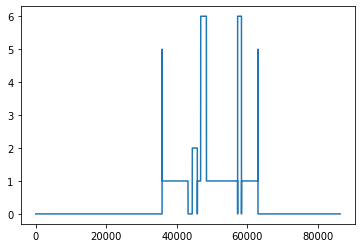

In [5]:
import matplotlib.pyplot as plt
plt.plot(b[1, :])

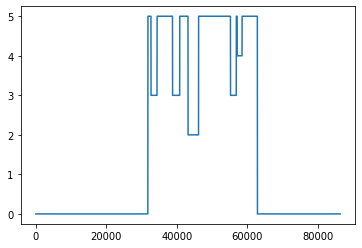

In [7]:
import occupancy_generator
a, b, c = occupancy_generator.OccupancyGenerator(model).generate_daily_schedule(add_to_model=False)
plt.plot(b[1, :])

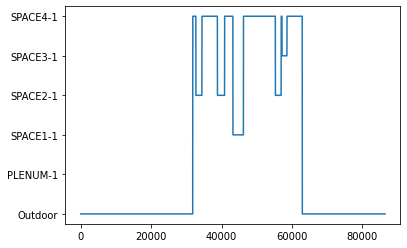

<Figure size 432x288 with 0 Axes>

In [20]:
plt.plot(b[1, :])
minimum = int(min(b[1, :]))
maximum = int(max(b[1, :]) + 1)
plt.yticks(range(minimum, maximum), c[minimum:maximum])
plt.gcf().autofmt_xdate()
plt.show()